### Product and Retail Data Analysis


#### About out Data
- Company - UK-based and registered non-store online retail
- Products for selling - Mainly all-occasion gifts
- Customers - Most are wholesalers (local or international)
- Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)

In [1]:
# Download and unzip our zipfile
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = 'https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/ecommerce_data.zip'
zipresp = urlopen(zipurl) # Create a new file on the hard drive
tempzip = open("/tmp/tempfile.zip", "wb") # Write the contents of the downloaded file into the new file
tempzip.write(zipresp.read()) # Close the newly-created file
tempzip.close() # Re-open the newly-created file with ZipFile()
zf = ZipFile("/tmp/tempfile.zip") # Extract its contents into <extraction_path>
zf.extractall(path = '') # note that extractall will automatically create the path, left blank so it's in working directory
# close the ZipFile instance
zf.close()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("ecommerce_data.csv" , encoding= 'unicode_escape')


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.shape

(541909, 8)

In [8]:
# df_new without missing values
df = df.dropna()

In [9]:
# change the invoice_date format - String to Timestamp format
df['InvoiceDate'] = pd.to_datetime(df["InvoiceDate"])
# change columns tyoe - String to Int type 
df['CustomerID'] = df['CustomerID'].astype('int64')

df['total_price'] = df['Quantity'] * df['UnitPrice']

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID,total_price
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [11]:
# remove negative quanitites

df = df[df.Quantity > 0]
df.describe().round(2)

,Quantity,UnitPrice,CustomerID,total_price
count,397924.00,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32,22.39
std,180.42,22.10,1713.17,309.06
min,1.00,0.00,12346.00,0.00
25%,2.00,1.25,13969.00,4.68
50%,6.00,1.95,15159.00,11.80
75%,12.00,3.75,16795.00,19.80
max,80995.00,8142.75,18287.00,168469.60


In [12]:
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df = df.join(pd.concat((getattr(df['InvoiceDate'].dt, i).rename(i) for i in L), axis=1))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,335,48,4


In [13]:
df.dayofweek.unique()

array([2, 3, 4, 6, 0, 1])

In [14]:
# +1 to make Monday=1.....until Sunday=7
df['dayofweek'] = df['dayofweek'] + 1

## Exploring and Analysing the Data

In [15]:
sales_per_cust = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
sales_per_cust.columns = ['CustomerID', 'Country', "NumberOfSales"]
sales_per_cust.head()

,CustomerID,Country,NumberOfSales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


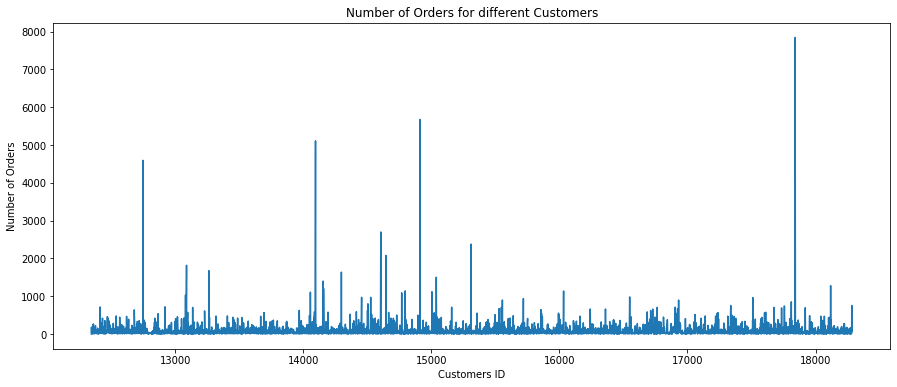

In [16]:
# Visualizing No. of Sales for all Customers

orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

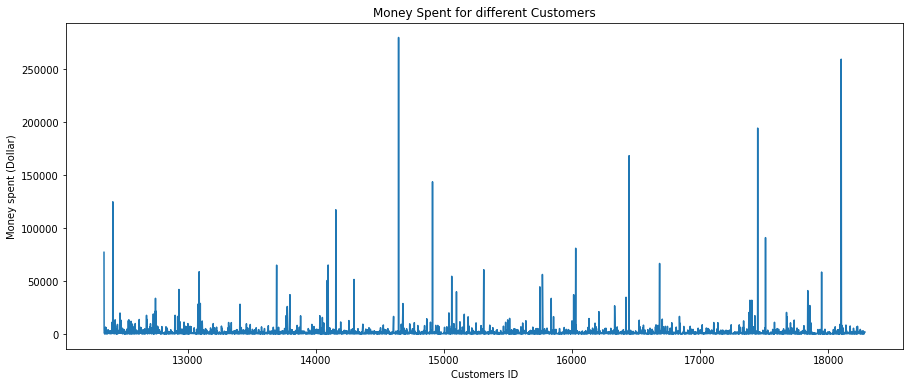

In [17]:
# Visualizing Money Spent for all Customer

money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['total_price'].sum()
plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.total_price)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [18]:
spent_per_cust = df.groupby(by=['CustomerID','Country'], as_index=False)['total_price'].sum().sort_values(by='total_price', ascending=False)
spent_per_cust.head(10)

,CustomerID,Country,total_price
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


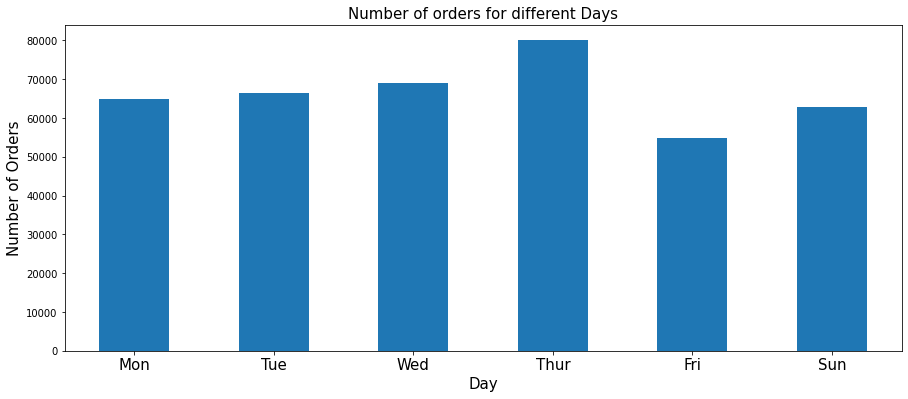

In [19]:
# Create a plot for the above
ax = df.groupby('dayofweek')['InvoiceNo'].count().sort_index().plot(kind ='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

In [20]:
# Insert a new column as our Hour extracted from InvoiceDate
df.insert(loc=10,column='hour', value=df.InvoiceDate.dt.hour)
df['hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

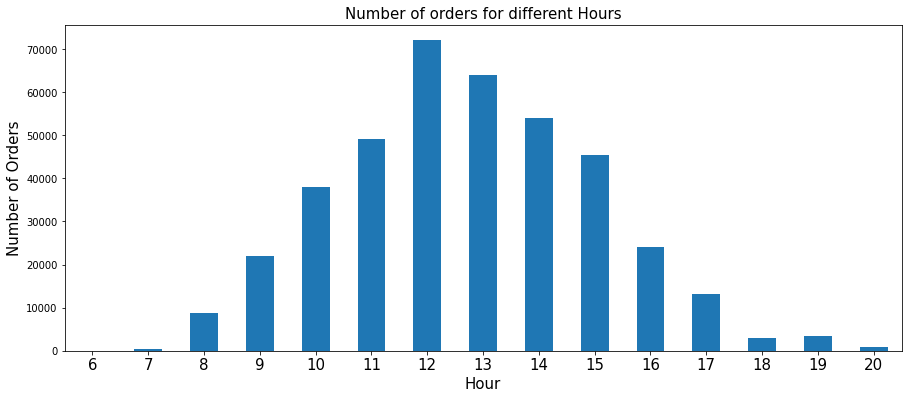

In [21]:
ax = df.groupby('hour')['InvoiceNo'].count().sort_index().plot(kind = 'bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

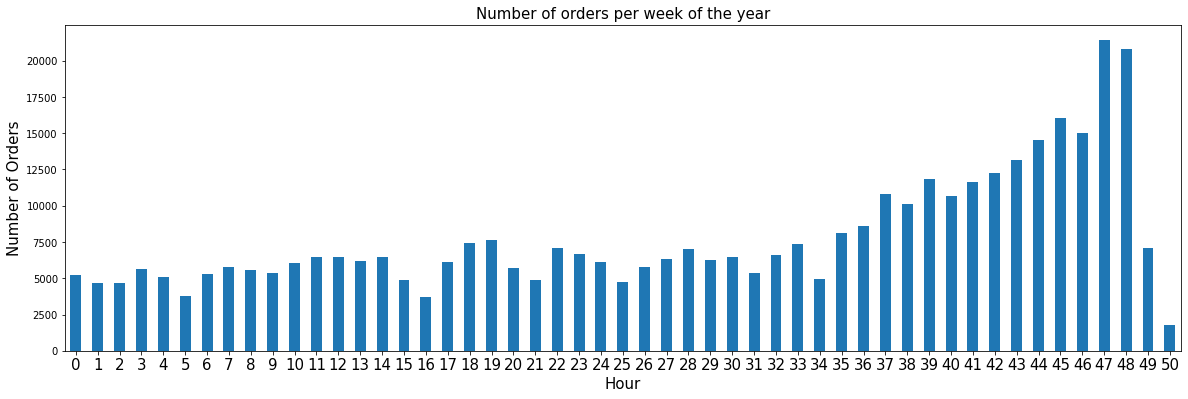

In [22]:
# Number of sales per week of the year
ax = df.groupby('weekofyear')['InvoiceNo'].count().sort_index().plot(kind = 'bar',figsize=(20,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders per week of the year',fontsize=15)
ax.set_xticklabels(range(0,52), rotation='horizontal', fontsize=15)
plt.show()

In [23]:
# Import our modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#import missingno as msno # missing data visualization module for Python
import pandas_profiling

import gc
import datetime

%matplotlib inline
# Using ggplot's style
plt.style.use('ggplot')

### Analyze Unit Prices

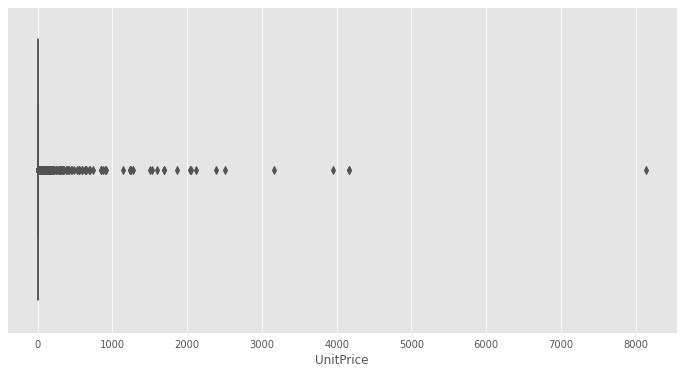

In [24]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df.UnitPrice)
plt.show()

In [25]:
df.UnitPrice.describe()


count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

### Analysis per Country

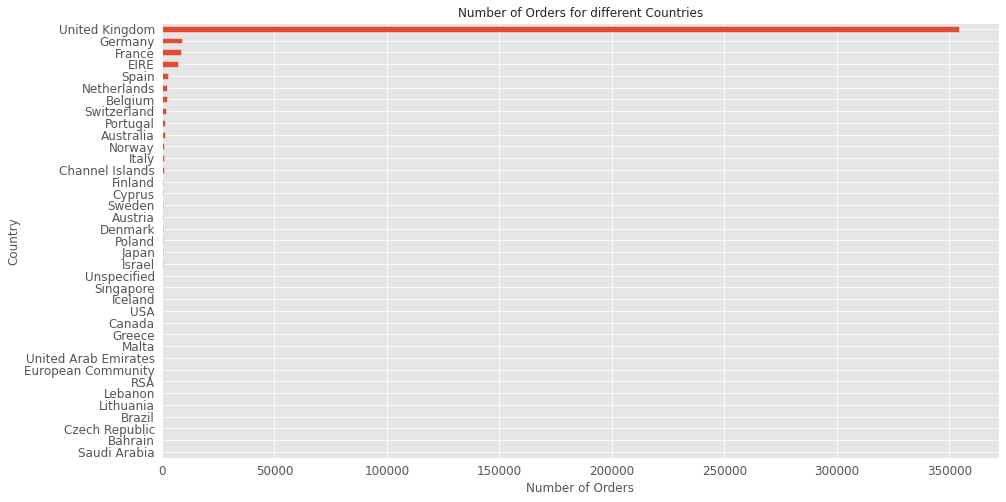

In [26]:
# plot number of unique customers in each country

group_country_orders = df.groupby('Country')['InvoiceDate'].count().sort_values()
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

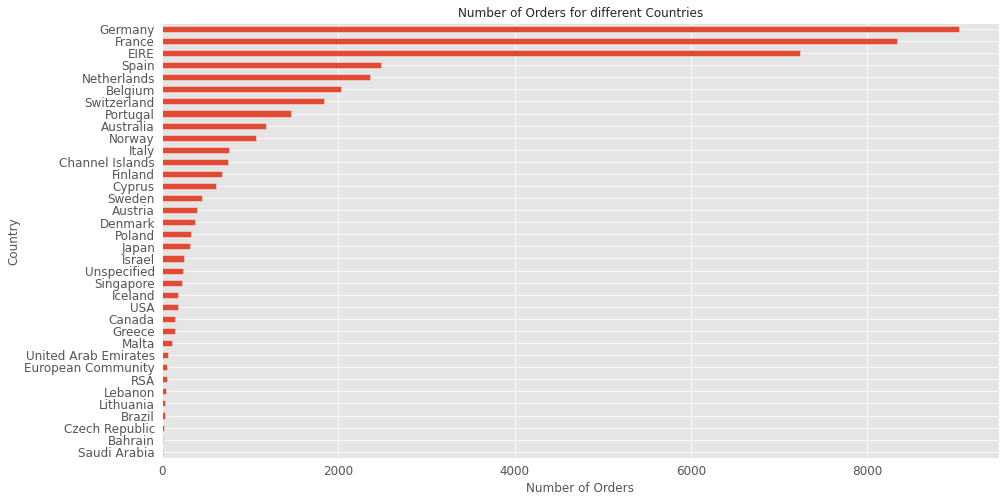

In [27]:
# Excluding UK to have better view
del group_country_orders['United Kingdom']
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

**Analysis is not Ended!**